# Importing libraries

In [121]:
import os
import pandas as pd #numpy is used for calcuations
import numpy as np #for data manipulation and data anyalsis
import matplotlib.pyplot as plt
%matplotlib inline 
#it will create backend for matplotlib in jupyter notebook 
import seaborn as sns

# Loading Train and Test Data

In [122]:
titanic_train_data=pd.read_csv("C:/Users/admin/Desktop/data science programs/titanic dataset/train.csv")

titanic_test_data=pd.read_csv("C:/Users/admin/Desktop/data science programs/titanic dataset/test.csv")


# Data types

In [123]:
titanic_test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Shape

In [124]:
titanic_train_data.shape

(891, 12)

In [125]:
titanic_test_data.shape

(418, 11)

In [126]:
titanic_train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Droping uncessary columns

In [127]:
titanic_train_data=titanic_train_data.drop("PassengerId",axis=1)
titanic_test_data=titanic_test_data.drop("PassengerId",axis=1)

titanic_train_data=titanic_train_data.drop("Cabin",axis=1)
titanic_test_data=titanic_test_data.drop("Cabin",axis=1)

titanic_train_data=titanic_train_data.drop("Ticket",axis=1)
titanic_test_data=titanic_test_data.drop("Ticket",axis=1)

titanic_train_data=titanic_train_data.drop("Name",axis=1)
titanic_test_data=titanic_test_data.drop("Name",axis=1)

In [128]:
titanic_train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [129]:
titanic_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


# changeing data type of train and test attributes

In [130]:
#change data type 
train_data=['Survived', 'Pclass', 'Sex', 'SibSp', 'Embarked']
#change data type 
test_data=['Pclass', 'Sex', 'SibSp','Embarked']

In [131]:
titanic_train_data[train_data]=titanic_train_data[train_data].astype('category')
titanic_test_data[test_data]=titanic_test_data[test_data].astype('category')

# Checking for missing values

In [132]:
titanic_train_data.isnull().sum()
titanic_test_data.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

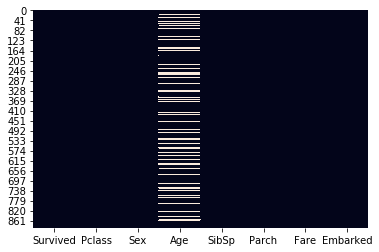

In [133]:
sns.heatmap(titanic_train_data.isnull(), cbar=False)

In [134]:
titanic_train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

# Replacing Missing values with mean and mode

In [135]:
titanic_train_data['Age'].fillna(titanic_train_data['Age'].mean(),inplace=True)
titanic_test_data['Age'].fillna(titanic_test_data['Age'].mean(),inplace=True)

titanic_train_data['Embarked'].fillna(titanic_train_data['Embarked'].mode()[0],inplace=True)
titanic_test_data['Embarked'].fillna(titanic_test_data['Embarked'].mode()[0],inplace=True)

titanic_test_data['Fare'].fillna(titanic_test_data['Fare'].mean(),inplace=True)


In [136]:
titanic_train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# checking for outliers

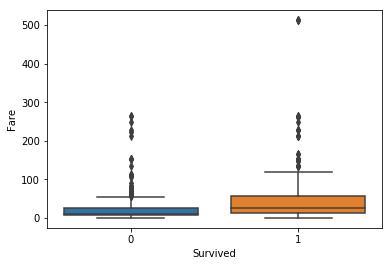

In [137]:
sns.boxplot(x='Survived',y='Fare',data=titanic_train_data)

# Test Train Split

In [164]:
from sklearn import preprocessing, metrics, cross_validation

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [165]:
from sklearn.model_selection import train_test_split

In [166]:
# Divide in to train and test
y=titanic_train_data["Survived"]
x=titanic_train_data.drop('Survived', axis=1)

trainX,testX,trainY,testY = train_test_split(x,y, random_state = 10, test_size = 0.20)

In [167]:
from sklearn.preprocessing import StandardScaler

In [168]:
trainX.dtypes

Pclass      category
Sex         category
Age          float64
SibSp       category
Parch          int64
Fare         float64
Embarked    category
dtype: object

In [169]:
trainX.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
57,3,male,28.500000,0,0,7.2292,C
717,2,female,27.000000,0,0,10.5000,S
431,3,female,29.699118,1,0,16.1000,S
633,1,male,29.699118,0,0,0.0000,S
163,3,male,17.000000,0,0,8.6625,S


In [170]:
#taking numeric values
num_values1=trainX.select_dtypes(['float64','int64']).columns

In [171]:
#we can standadise only numerical columns
#standarizing
scaler = StandardScaler()
scaler.fit(trainX[num_values1])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [172]:
#tranforming in actual data
trainX[num_values1]=scaler.transform(trainX[num_values1])
testX[num_values1]=scaler.transform(testX[num_values1])

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

In [173]:
#checking std scale of values
trainX.describe()
testX.dtypes

Pclass      category
Sex         category
Age          float64
SibSp       category
Parch        float64
Fare         float64
Embarked    category
dtype: object

In [174]:
trainX = pd.get_dummies(trainX)
testX = pd.get_dummies(testX)

In [175]:
trainX.columns

Index(['Age', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3',
       'SibSp_4', 'SibSp_5', 'SibSp_8', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [176]:
trainX.shape

(712, 18)

In [177]:
testX.shape

(179, 18)

In [178]:
testX.shape

(179, 18)

In [179]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  cross_val_score ,RandomizedSearchCV ,train_test_split , GridSearchCV
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
Random_Forest= RandomForestClassifier(n_estimators=500, max_depth=3,max_features=4,n_jobs=-1)
Random_Forest.fit(trainX ,trainY)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [180]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

train_pred = Random_Forest.predict(trainX)
print(accuracy_score(trainY,train_pred))
test_pred= Random_Forest.predict(testX)
print(accuracy_score(testY,test_pred))

0.8075842696629213
0.8100558659217877
